Fonte dos dados: http://fossilworks.org/


Para que façamos uma boa análise de dados, precisamos formular boas perguntas. Aqui estão algumas perguntas que pretendo responder com esse conjunto de dados: 

 

*   Periodos geológicos da amostra;
*   Espécies mais abundantes;
*   Generos mais abundantes;
*   Laboratórios com mais fósseis registrados;
*   



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
dados = pd.read_csv("/content/drive/My Drive/DataScience/Paleo/Dados_20_10/ChristianFreitas-occs.csv", sep = ",")

In [6]:
#Visualizando a quantidade de linhas e colunas
dados.shape

(5071, 13)

In [4]:
#Visualizando as 5 primeiras linhas
dados.head()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
0,12855,PaleoDB,E. Fara,n. gen.,Noterpeton,n. sp.,bolivianum,NaN,NaN,NaN,NaN,39674,Cretaceous 8
1,12855,PaleoDB,E. Fara,NaN,Pucabatis,NaN,hoffstetteri,NaN,NaN,NaN,NaN,39674,Cretaceous 8
2,12855,PaleoDB,E. Fara,NaN,Pucapristis,NaN,branisi,NaN,NaN,NaN,NaN,39674,Cretaceous 8
3,12855,PaleoDB,E. Fara,NaN,Coelodus,NaN,toncoensis,NaN,NaN,NaN,NaN,39674,Cretaceous 8
4,12855,PaleoDB,E. Fara,NaN,Lepisosteus,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8


In [5]:
#Visualizando as 5 últimas linhas
dados.tail()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
5066,210982,NaN,P. Wagner,NaN,Sacabambaspis,NaN,janvieri,NaN,NaN,NaN,NaN,72844,Ordovician 4
5067,210982,NaN,P. Wagner,NaN,Dignomia,NaN,munsterii,NaN,Dignomia,NaN,boliviana,72844,Ordovician 4
5068,210982,NaN,P. Wagner,NaN,Bistramia,NaN,elegans,NaN,NaN,NaN,NaN,72844,Ordovician 4
5069,210982,NaN,P. Wagner,NaN,Homalonotus,NaN,bistrami,NaN,NaN,NaN,NaN,72844,Ordovician 4
5070,211282,NaN,P. Mannion,NaN,Psilopterus,NaN,sp.,NaN,NaN,NaN,NaN,72952,Cenozoic 6


In [7]:
#Verificando o nome das colunas
dados.columns

Index(['collection_no', 'source_database', 'collection.authorizer',
       'occurrence.genus_reso', 'occurrence.genus_name',
       'occurrence.species_reso', 'occurrence.species_name',
       'original.genus_reso', 'original.genus_name', 'original.species_reso',
       'original.species_name', 'collection.reference_no', '10_my_bin'],
      dtype='object')

In [8]:
#Verificando a quantidade de valores que inexistentes
dados.isnull().sum()

collection_no                 0
source_database            1157
collection.authorizer         0
occurrence.genus_reso      4285
occurrence.genus_name         0
occurrence.species_reso    3941
occurrence.species_name       0
original.genus_reso        5014
original.genus_name        4296
original.species_reso      4937
original.species_name      4296
collection.reference_no       0
10_my_bin                  1030
dtype: int64

Podemos ver, as espécies de muitos fósseis presentes neste conjunto de dados, ainda não foram identificadas. Sabemos disso porque é utilizado a abreviação "sp", para esses casos.

Fonte: [Embrapa](https://www.embrapa.br/manual-de-editoracao/nomenclatura-cientifica/nomes-cientficos/-/journal_content/56_INSTANCE_HscRfKvOm1wj/1355746/28877098?p_p_state=pop_up&_56_INSTANCE_HscRfKvOm1wj_page=1&_56_INSTANCE_HscRfKvOm1wj_viewMode=print#:~:text=Quando%20a%20esp%C3%A9cie%20ainda%20n%C3%A3o,it%C3%A1lico%2C%20e%20as%20abreviaturas%20sp.)

In [9]:
dados['occurrence.species_name'].value_counts()

sp.             1256
paraensis         34
brasiliensis      28
colombianus       26
pirabensis        23
                ... 
riggsi             1
provicugna         1
fissilis           1
nemophagus         1
gibbus             1
Name: occurrence.species_name, Length: 1720, dtype: int64

In [10]:
dados[dados['occurrence.species_name'] == "sp."].head()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
4,12855,PaleoDB,E. Fara,NaN,Lepisosteus,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
6,12855,PaleoDB,E. Fara,NaN,Rhineastes,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
16,12855,PaleoDB,E. Fara,NaN,Andinichthys,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
18,12855,PaleoDB,E. Fara,NaN,Enchodus,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8
19,12855,PaleoDB,E. Fara,NaN,Santosius,NaN,sp.,NaN,NaN,NaN,NaN,39674,Cretaceous 8


In [11]:
dados[dados['occurrence.species_name'] == "brasiliensis"].head()

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
88,13220,Fossilworks,J. Alroy,NaN,Prozostrodon,n. sp.,brasiliensis,NaN,Thrinaxodon,n. sp.,brasiliensis,4389,NaN
137,13501,Fossilworks,J. Alroy,NaN,Podocnemis,?,brasiliensis,NaN,NaN,NaN,NaN,6116,Cenozoic 1
543,48091,PaleoDB,J. Head,n. gen.,Hoffstetterella,n. sp.,brasiliensis,NaN,NaN,NaN,NaN,12895,NaN
544,48091,PaleoDB,J. Head,cf.,Hoffstetterella,NaN,brasiliensis,NaN,NaN,NaN,NaN,12895,NaN
563,51627,ETE,M. Carrano,NaN,Antarctosaurus,n. sp.,brasiliensis,NaN,NaN,NaN,NaN,13713,NaN


In [12]:
dados['10_my_bin'].value_counts()

Cenozoic 6      1660
Cenozoic 5      1527
Cenozoic 3       140
Cretaceous 8      92
Cenozoic 1        80
Jurassic 5        79
Triassic 2        75
Cenozoic 4        72
Cretaceous 4      65
Permian 2         45
Cenozoic 2        39
Triassic 4        37
Cretaceous 2      29
Cretaceous 3      27
Cretaceous 7      11
Cretaceous 6      11
Permian 3         10
Triassic 1        10
Triassic 3        10
Ordovician 2       6
Ordovician 4       5
Permian 1          4
Cretaceous 5       3
Cretaceous 1       2
Jurassic 1         1
Jurassic 3         1
Name: 10_my_bin, dtype: int64

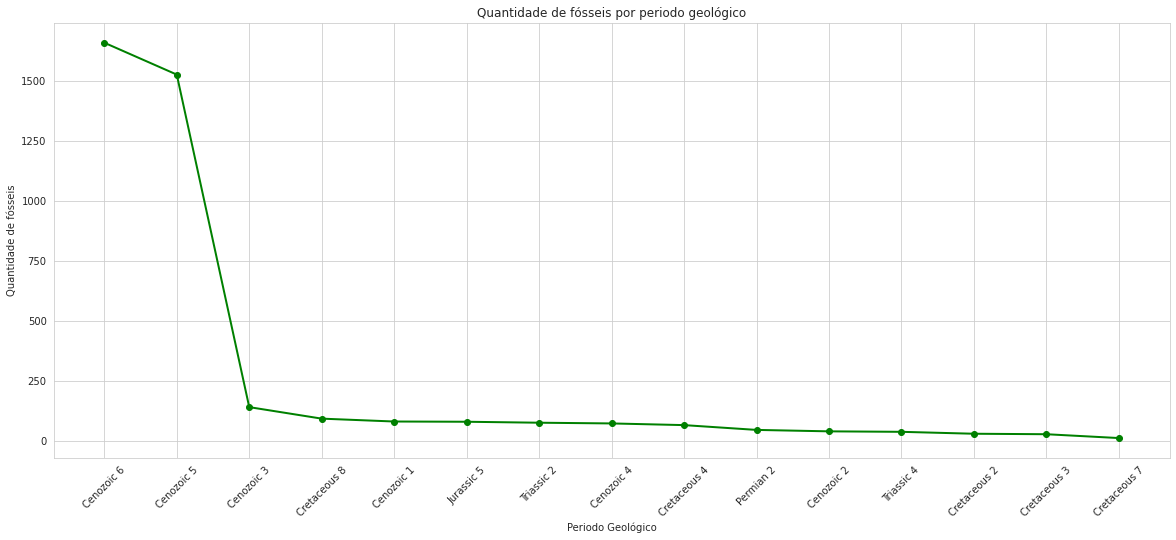

In [15]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis por periodo geológico")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Periodo Geológico")
plt.plot(dados['10_my_bin'].value_counts().head(15), marker="o", linewidth=2, color='green')

In [16]:
dados['occurrence.genus_name'].value_counts()

Purussaurus     42
Carcharhinus    40
Equus           40
Megatherium     39
Sula            39
                ..
Ayllusuchus      1
Eopululo         1
Thrichomys       1
Abothrodon       1
Arctodictis      1
Name: occurrence.genus_name, Length: 1856, dtype: int64

Podemos ver que o gênero com maior número de registros, nesse conjunto de dados, é o Purussaurus, com 42 registros.

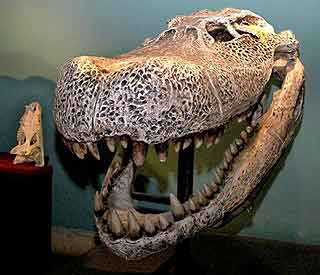

Habitava a região da floresta amazônica, incluindo Brasil, Panamá, Peru, Colômbia e Venezuela, durante o periódo Mioceno.

Fonte: 
*   https://dinopedia.fandom.com/wiki/Purussaurus
*   https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0117944


In [17]:
dados['occurrence.genus_name'].value_counts().head(15)

Purussaurus      42
Carcharhinus     40
Equus            40
Megatherium      39
Sula             39
Glyptodon        37
Turritella       33
Scleromys        27
Mourasuchus      27
Glossotherium    27
Eremotherium     25
Hyperodapedon    25
Gryposuchus      24
Caiman           24
Toxodon          24
Name: occurrence.genus_name, dtype: int64

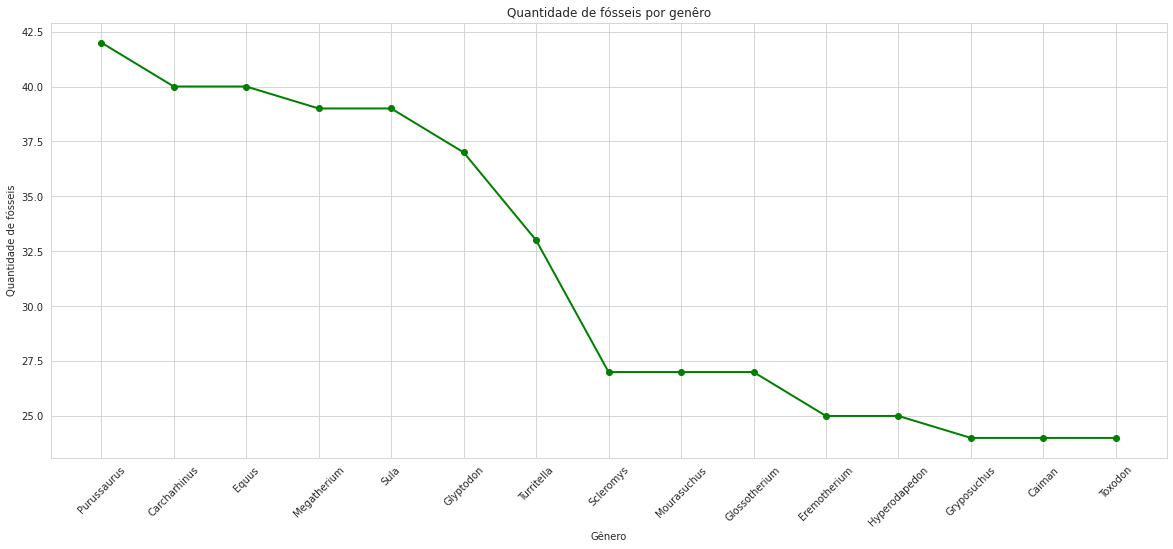

In [18]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis por genêro")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Gênero")
plt.plot(dados['occurrence.genus_name'].value_counts().head(15), marker="o", linewidth=2, color='green')

In [31]:
dados[dados['occurrence.genus_name'] == "Purussaurus"]['occurrence.species_name'].value_counts()

sp.             23
neivensis        9
mirandai         8
brasiliensis     2
Name: occurrence.species_name, dtype: int64

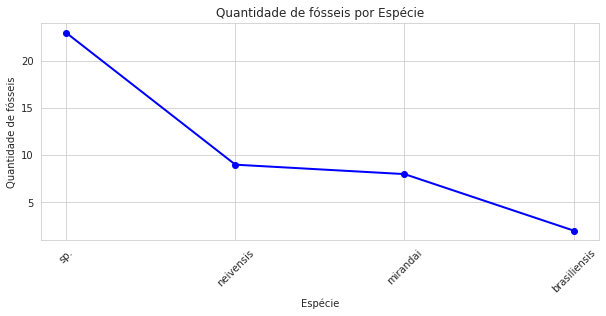

In [34]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
plt.grid(True)
plt.title("Quantidade de fósseis por Espécie")
plt.ylabel("Quantidade de fósseis")
plt.xlabel("Espécie")
plt.plot(dados[dados['occurrence.genus_name'] == "Purussaurus"]['occurrence.species_name'].value_counts(), marker="o", linewidth=2, color='blue')

In [19]:
dados['collection.authorizer'].value_counts()

M. Uhen         1874
C. Jaramillo     868
P. Mannion       411
J. Alroy         404
M. Carrano       314
J. Zijlstra      271
D. Croft         222
R. Butler        198
C. Bell          114
M. Clapham        89
P. Holroyd        70
J. Mueller        50
J. Head           31
R. Benson         29
E. Fara           22
A. Cardenas       18
J. Hunter         18
M. Foote          14
S. Peters          9
A. Hendy           7
A. Liparini        7
P. Wagner          5
W. Kiessling       5
G. Lloyd           5
AD. Rincon         3
M. Aberhan         3
T. Olszewski       3
A. Stafford        2
V. Fischer         2
A. Rincon          1
E. Vlachos         1
J. Marcot          1
Name: collection.authorizer, dtype: int64

Laboratório Uhen da Universidade de George Mason, no estado da Virgínia, Estados Unidos: http://uhenlab.weebly.com/

In [36]:
dados[dados['10_my_bin'] == "Jurassic 3"]

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
4218,172177,NaN,M. Carrano,NaN,Ichthyosaurus,NaN,sp.,NaN,NaN,NaN,NaN,55912,Jurassic 3


In [35]:
dados[dados['10_my_bin'] == "Jurassic 1"]

,collection_no,source_database,collection.authorizer,occurrence.genus_reso,occurrence.genus_name,occurrence.species_reso,occurrence.species_name,original.genus_reso,original.genus_name,original.species_reso,original.species_name,collection.reference_no,10_my_bin
4038,159703,NaN,R. Benson,n. gen.,Laquintasaura,n. sp.,venezuelae,NaN,NaN,NaN,NaN,52146,Jurassic 1
